## Task 1.2: Use the datasets library from Hugging Face to download the arabic- generated-abstracts dataset directly into a Python environment (By Google Colab).

In [ ]:
# !pip install datasets
# !pip install python-dotenv


In [ ]:
from dotenv import load_dotenv
import os
from huggingface_hub import login

load_dotenv()

hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
dataset = load_dataset("KFUPM-JRCAI/arabic-generated-abstracts")
print(dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/by_polishing-00000-of-00001.parquet:   0%|          | 0.00/8.49M [00:00<?, ?B/s]

data/from_title-00000-of-00001.parquet:   0%|          | 0.00/6.90M [00:00<?, ?B/s]

data/from_title_and_content-00000-of-000(…):   0%|          | 0.00/7.01M [00:00<?, ?B/s]

Generating by_polishing split:   0%|          | 0/2851 [00:00<?, ? examples/s]

Generating from_title split:   0%|          | 0/2963 [00:00<?, ? examples/s]

Generating from_title_and_content split:   0%|          | 0/2574 [00:00<?, ? examples/s]

DatasetDict({
    by_polishing: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2851
    })
    from_title: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2963
    })
    from_title_and_content: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2574
    })
})


In [ ]:
# Print split names
print("\nAvailable splits:", list(dataset.keys()))


Available splits: ['by_polishing', 'from_title', 'from_title_and_content']


### Task 1.3: Perform initial data exploration:



#### Explore Any Split


In [ ]:
import pandas as pd

def explore_split(dataset, split_name):
    print(f"\n\n==============================================")
    print(f" Exploring Split: {split_name}")
    print("==============================================")

    split = dataset[split_name]

    # Inspect features
    print("\n➡ Column Names and Data Types:")
    print(split.features)

    # Convert to pandas
    df = split.to_pandas()

    print("\n➡ First 5 Rows:")
    display(df.head())

    print("\n➡ Dataset Shape:")
    print(df.shape)

    print("\n➡ Columns and Types:")
    print(df.dtypes)

    # ---- Target variable check ----
    if "label" in df.columns:
        print("\n➡ Target Variable Distribution (0 = Human, 1 = AI Generated):")
        print(df["label"].value_counts())

        print("\n➡ Percentage Distribution (%):")
        print(df["label"].value_counts(normalize=True) * 100)
    else:
        print("\n⚠ No 'label' column found — skipping label distribution.")

    # ---- Text length analysis ----
    text_columns = [c for c in df.columns if c != "label"]

    if text_columns:
        text_col = text_columns[0]
        df["text_length"] = df[text_col].astype(str).apply(len)

        print(f"\n➡ Text Length Summary for column: {text_col}")
        print(df["text_length"].describe())

        print(f"\n➡ Sample Text Example from {text_col}:")
        print("\n", df[text_col].iloc[0])

    return df

In [ ]:
splits = ["by_polishing", "from_title", "from_title_and_content"]

dfs = {}  # store pandas dataframes

for split in splits:
    dfs[split] = explore_split(dataset, split)



 Exploring Split: by_polishing

➡ Column Names and Data Types:
{'original_abstract': Value('string'), 'allam_generated_abstract': Value('string'), 'jais_generated_abstract': Value('string'), 'llama_generated_abstract': Value('string'), 'openai_generated_abstract': Value('string')}

➡ First 5 Rows:


,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع التعليم بين النساء الأن...,تدرس هذه الدراسة دور المرأة في التعليم في الأن...,يُقدم هذا البحث دراسة شاملة حول حالة التعليم ع...,صور نظام التعليم عند المرأة الأندلسية تستند إل...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,يتناول هذا البحث دراسة انهيار دولة الموحدين من...,كان العامل الثقافي من بين الأسباب الرئيسية الت...,يعد العامل الثقافي أحد أبرز الأسباب التي يعزى ...,انهيار دولة الموحدين يعود بشكل كبير للعوامل ال...
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,هدفت هذه الدراسة إلى تسليط الضوء على جهود قادة...,تدرس هذه الدراسة جهود قادة الثورة الجزائرية خل...,شكلت الجهود التي بذلها قادة الثورة الجزائرية خ...,جهود قادة الثورة الجزائرية خلال المرحلة الأولى...
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,يتناول هذا البحث إشكالية الضرائب غير الشرعية ف...,تدرس المقالة مشكلة الضرائب غير الشرعية في مراح...,يقوم البحث على دراسة الضرائب غير الشرعية في دو...,المقال يناقش قضية الضرائب غير الشرعية في دولتي...
4,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,تتناول هذه الدراسة حركة الانتصار للحريات الديم...,حركة انتصار الحريات الديمقراطية (MTLD)، وهي حر...,تُظهر المصادر التاريخية المتاحة حول تطور الحرك...,حركة انتصار الحريات الديمقراطية (MTLD) في الجز...



➡ Dataset Shape:
(2851, 5)

➡ Columns and Types:
original_abstract            object
allam_generated_abstract     object
jais_generated_abstract      object
llama_generated_abstract     object
openai_generated_abstract    object
dtype: object

⚠ No 'label' column found — skipping label distribution.

➡ Text Length Summary for column: original_abstract
count    2851.000000
mean      741.039284
std       227.550472
min       411.000000
25%       577.000000
50%       690.000000
75%       847.000000
max      1844.000000
Name: text_length, dtype: float64

➡ Sample Text Example from original_abstract:

 كثيرا ما ارتبطت المصادر التاريخية في الأندلس خاصة منها كتب التراجم والفهرسات والبرامج وغيرها بدراسة حياة العلماء والرواة والقضاة والساسة ؛ وقد تطورت هذه المادة حتى ترك لنا المؤلفون الأندلسيون سلسلة متواصلة الحلقات من كتب التـراجم كالصلة لابن بشكوال ، وصلة الصلة لابن الزبير، والتكملة لكتاب الصلة لابن الآبار، والذيل والتكملة لكتابي الموصول والصلة لابن عبد الملك المراكشي إضافة إلى الإحاطة في أخ

,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يهدف هذا البحث إلى دراسة نظام التعليم عند المر...,تدرس هذه الورقة البحثية نظام التعليم لدى المرأ...,تهدف هذه الورقة البحثية إلى استكشاف صور نظام ا...,البحث يستكشف نظام التعليم عند المرأة الأندلسية...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,تهدف هذه الدراسة إلى تحليل انهيار دولة الموحدي...,تدرس هذه الورقة البحثية انهيار دولة الموحدين، ...,يتناول هذا البحث انهيار دولة الموحدين من خلال ...,تتناول هذه الدراسة البحثية انهيار دولة الموحدي...
2,يقوم المقال على اشكالية الضرائب الغير شرعية في...,تهدف هذه الدراسة إلى استكشاف ظاهرة الضرائب غير...,تدرس هذه الورقة البحثية ظاهرة التهرب الضريبي ف...,يُقدم هذا البحث دراسة تحليلية شاملة للضرائب غي...,تتناول هذه الدراسة البحثية موضوع الضرائب غير ا...
3,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,تهدف هذه الدراسة إلى تحليل حركة انتصار الحريات...,حركة انتصار الحريات الديمقراطية -MTLD-(1945-19...,حركة انتصار الحريات الديمقراطية (MTLD) بين الأ...,"دراسـة ""حركـة انتصـار الحريّـات الديمقراطيـة -..."
4,تعددت صور الحياة الثقافية و الفكرية و الأدبية ...,تهدف هذه الدراسة إلى استكشاف تأثير السلطة العل...,تدرس هذه الورقة البحثية تأثير السلطة العالمة ع...,يستعرض هذا البحث تأثير السلطة العالمة على الإب...,تتناول هذه الورقة البحثية تأثير الهيمنة العالم...



➡ Dataset Shape:
(2963, 5)

➡ Columns and Types:
original_abstract            object
allam_generated_abstract     object
jais_generated_abstract      object
llama_generated_abstract     object
openai_generated_abstract    object
dtype: object

⚠ No 'label' column found — skipping label distribution.

➡ Text Length Summary for column: original_abstract
count    2963.000000
mean      739.858589
std       227.030533
min       411.000000
25%       576.000000
50%       690.000000
75%       846.000000
max      1891.000000
Name: text_length, dtype: float64

➡ Sample Text Example from original_abstract:

 كثيرا ما ارتبطت المصادر التاريخية في الأندلس خاصة منها كتب التراجم والفهرسات والبرامج وغيرها بدراسة حياة العلماء والرواة والقضاة والساسة ؛ وقد تطورت هذه المادة حتى ترك لنا المؤلفون الأندلسيون سلسلة متواصلة الحلقات من كتب التـراجم كالصلة لابن بشكوال ، وصلة الصلة لابن الزبير، والتكملة لكتاب الصلة لابن الآبار، والذيل والتكملة لكتابي الموصول والصلة لابن عبد الملك المراكشي إضافة إلى الإحاطة في أخ

,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع نظام التعليم عند المرأة...,تتناول هذه الدراسة نظام التعليم عند المرأة الأ...,تناولت هذه الدراسة نظام التعليم عند المرأة الأ...,يركز البحث على نظام التعليم للمرأة في الأندلس،...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,يتناول هذا البحث دراسة خلفيات انهيار دولة المو...,يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...,انهيار دولة الموحدين – دراسة في الخلفيات الثقا...,تناول البحث انهيار دولة الموحدين من منظور خلفي...
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,يتناول هذا البحث موضوع تسليح جيش التحرير الوطن...,للأسف، النص المقدم غير واضح وغير قابل للقراءة ...,تسليح جيش التحرير الوطني عبر الحدود الغربية خل...,يبحث هذا البحث في تسليح جيش التحرير الوطني الج...
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,يتناول هذا البحث موضوع الضرائب غير الشرعية في ...,يناقش المقال مشكلة الضرائب غير الشرعية في مراح...,تناولت هذه الدراسة الضرائب غير الشرعية في دولت...,يتناول البحث مسألة الضرائب غير الشرعية في دولت...
4,تعددت صور الحياة الثقافية و الفكرية و الأدبية ...,يتناول هذا البحث تأثير السلطة العالمة في الإبد...,تتناول هذه الدراسة تأثير السلطة العالمة على ال...,أثر السلطة العالمة في الإبداع الفكري والأدبي ا...,يتناول البحث موضوع دور السلطة العالمة في تعزيز...



➡ Dataset Shape:
(2574, 5)

➡ Columns and Types:
original_abstract            object
allam_generated_abstract     object
jais_generated_abstract      object
llama_generated_abstract     object
openai_generated_abstract    object
dtype: object

⚠ No 'label' column found — skipping label distribution.

➡ Text Length Summary for column: original_abstract
count    2574.000000
mean      740.035354
std       225.088162
min       416.000000
25%       577.000000
50%       690.500000
75%       846.000000
max      1891.000000
Name: text_length, dtype: float64

➡ Sample Text Example from original_abstract:

 كثيرا ما ارتبطت المصادر التاريخية في الأندلس خاصة منها كتب التراجم والفهرسات والبرامج وغيرها بدراسة حياة العلماء والرواة والقضاة والساسة ؛ وقد تطورت هذه المادة حتى ترك لنا المؤلفون الأندلسيون سلسلة متواصلة الحلقات من كتب التـراجم كالصلة لابن بشكوال ، وصلة الصلة لابن الزبير، والتكملة لكتاب الصلة لابن الآبار، والذيل والتكملة لكتابي الموصول والصلة لابن عبد الملك المراكشي إضافة إلى الإحاطة في أخ

#### 2- Check the distribution of the target variable (label: human vs. AI)


In [ ]:
# Function to compute distribution for any split
def compute_distribution(split, split_name):
    print(f"\n===== Distribution for split: {split_name} =====")

    # Count human abstracts (1 per row)
    num_human = len(split["original_abstract"])

    # Count AI abstracts (4 per row)
    num_ai = (
        len(split["allam_generated_abstract"])
        + len(split["jais_generated_abstract"])
        + len(split["llama_generated_abstract"])
        + len(split["openai_generated_abstract"])
    )

    # Print raw counts
    print("Number of human abstracts:", num_human)
    print("Number of AI-generated abstracts:", num_ai)

    # Percentages
    total = num_human + num_ai
    if total > 0:
        print("Human %:", round(num_human / total * 100, 2))
        print("AI %:", round(num_ai / total * 100, 2))
    else:
        print("No data available.")


# Apply to the 3 main splits
compute_distribution(dataset["by_polishing"], "by_polishing")
compute_distribution(dataset["from_title"], "from_title")
compute_distribution(dataset["from_title_and_content"], "from_title_and_content")


===== Distribution for split: by_polishing =====
Number of human abstracts: 2851
Number of AI-generated abstracts: 11404
Human %: 20.0
AI %: 80.0

===== Distribution for split: from_title =====
Number of human abstracts: 2963
Number of AI-generated abstracts: 11852
Human %: 20.0
AI %: 80.0

===== Distribution for split: from_title_and_content =====
Number of human abstracts: 2574
Number of AI-generated abstracts: 10296
Human %: 20.0
AI %: 80.0


#### 3- Assess data quality: check for missing values, duplicates, and inconsistencies:


Missing values → any None/NaN in columns

Duplicates → same abstract appearing multiple times

Inconsistencies → like empty strings " " or unusual data

In [ ]:
import pandas as pd

splits = ["by_polishing", "from_title", "from_title_and_content"]

for split_name in splits:
    print("\n========================================")
    print(f"Data Quality Checks — Split: {split_name}")
    print("========================================\n")

    split = dataset[split_name]

    # Convert to pandas DataFrame
    df = split.to_pandas()

    # 1. Missing values
    print(" Missing values per column:")
    print(df.isnull().sum())
    print("--------------------------------------------------")

    # 2. Duplicate rows
    total_duplicates = df.duplicated().sum()
    print(f" Number of duplicate rows: {total_duplicates}")

    # Duplicates in each column
    for col in df.columns:
        col_duplicates = df[col].duplicated().sum()
        print(f"  Duplicates in column '{col}': {col_duplicates}")
    print("--------------------------------------------------")

    # 3. Inconsistencies: empty strings or only spaces
    print(" Empty or blank values per column:")
    for col in df.columns:
        empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
        print(f"  Column '{col}': {empty_count}")

    print("\n\n")  # space between splits



Data Quality Checks — Split: by_polishing

 Missing values per column:
original_abstract            0
allam_generated_abstract     0
jais_generated_abstract      0
llama_generated_abstract     0
openai_generated_abstract    0
dtype: int64
--------------------------------------------------
 Number of duplicate rows: 0
  Duplicates in column 'original_abstract': 0
  Duplicates in column 'allam_generated_abstract': 0
  Duplicates in column 'jais_generated_abstract': 0
  Duplicates in column 'llama_generated_abstract': 0
  Duplicates in column 'openai_generated_abstract': 0
--------------------------------------------------
 Empty or blank values per column:
  Column 'original_abstract': 0
  Column 'allam_generated_abstract': 0
  Column 'jais_generated_abstract': 0
  Column 'llama_generated_abstract': 0
  Column 'openai_generated_abstract': 0




Data Quality Checks — Split: from_title

 Missing values per column:
original_abstract            0
allam_generated_abstract     0
jais_generate

## Phase 2 -preprocessing

In [ ]:
# task 2.1: Arabic Text Preprocessing

import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from datasets import load_dataset


In [ ]:
# Download required NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Check columns
print(df.head())

                                   original_abstract  \
0  كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...   
1  يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...   
2  شكلت تلك الجهود والمساعي الرائدة التي قام بها ...   
3  يقوم المقال على اشكالية الضرائب الغير شرعية في...   
4  تعددت صور الحياة الثقافية و الفكرية و الأدبية ...   

                            allam_generated_abstract  \
0  يتناول هذا البحث موضوع نظام التعليم عند المرأة...   
1  يتناول هذا البحث دراسة خلفيات انهيار دولة المو...   
2  يتناول هذا البحث موضوع تسليح جيش التحرير الوطن...   
3  يتناول هذا البحث موضوع الضرائب غير الشرعية في ...   
4  يتناول هذا البحث تأثير السلطة العالمة في الإبد...   

                             jais_generated_abstract  \
0  تتناول هذه الدراسة نظام التعليم عند المرأة الأ...   
1  يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...   
2  للأسف، النص المقدم غير واضح وغير قابل للقراءة ...   
3  يناقش المقال مشكلة الضرائب غير الشرعية في مراح...   
4  تتناول هذه الدراسة تأثير السلطة العالمة على

#Define Arabic text cleaning functions

In [ ]:
# Remove tashkeel (diacritics)
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_diacritics, '', text)

In [ ]:
# Normalize Arabic text
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[^؀-ۿ ]+", " ", text)  # remove non-Arabic chars
    return text

In [ ]:
# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words("arabic"))
stemmer = ISRIStemmer()

In [ ]:
# Full preprocessing pipeline
def preprocess_text(text):
    text = str(text)
    text = remove_diacritics(text)
    text = normalize_arabic(text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in arabic_stopwords]
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing
text_columns = [
    'original_abstract',
    'allam_generated_abstract',
    'jais_generated_abstract',
    'llama_generated_abstract',
    'openai_generated_abstract'
]
for col in text_columns:
    clean_col = col + "_clean"
    df[clean_col] = df[col].apply(preprocess_text)
print(" Preprocessing complete! Here are the new columns:")
print(df.columns)
df.head(2)

 Preprocessing complete! Here are the new columns:
Index(['original_abstract', 'allam_generated_abstract',
       'jais_generated_abstract', 'llama_generated_abstract',
       'openai_generated_abstract', 'original_abstract_clean',
       'allam_generated_abstract_clean', 'jais_generated_abstract_clean',
       'llama_generated_abstract_clean', 'openai_generated_abstract_clean'],
      dtype='object')


,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract,original_abstract_clean,allam_generated_abstract_clean,jais_generated_abstract_clean,llama_generated_abstract_clean,openai_generated_abstract_clean
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع نظام التعليم عند المرأة...,تتناول هذه الدراسة نظام التعليم عند المرأة الأ...,تناولت هذه الدراسة نظام التعليم عند المرأة الأ...,يركز البحث على نظام التعليم للمرأة في الأندلس،...,ربط صدر ارخ دلس خصه كتب رجم هرس رمج وغر درس حي...,نول بحث وضع نظم علم راه دلس خلل عصر سلم ركز بح...,نول درس نظم علم راه اندلسيه، كانت راه شرك ناج ...,نول درس نظم علم راه اندلسيه، كانت راه لعب دور ...,ركز بحث علي نظم علم راه دلس، عرض دور نسء حيه ف...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,يتناول هذا البحث دراسة خلفيات انهيار دولة المو...,يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...,انهيار دولة الموحدين – دراسة في الخلفيات الثقا...,تناول البحث انهيار دولة الموحدين من منظور خلفي...,يعد عمل ثقف احد برز سبب يعز سقط دول وحد ، حتي ...,نول بحث درس خلف هير دول وحد نظر ثقف يشر بحث ال...,يعد عمل ثقف احد برز سبب ادت الي سقط دول موحديه...,هير دول وحد درس خلف ثقف يعد عمل ثقف احد برز سب...,نول بحث هير دول وحد نظر خلف ثقافيه، برز دور كب...




# Task 2.2: Exploratory Data Analysis (EDA)



In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import numpy as np

##Text Length Distribution Plot



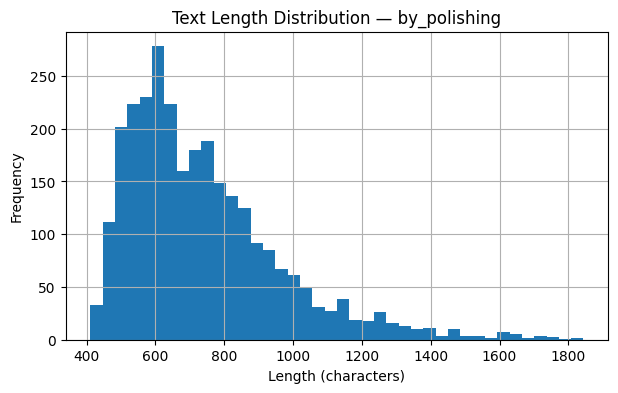

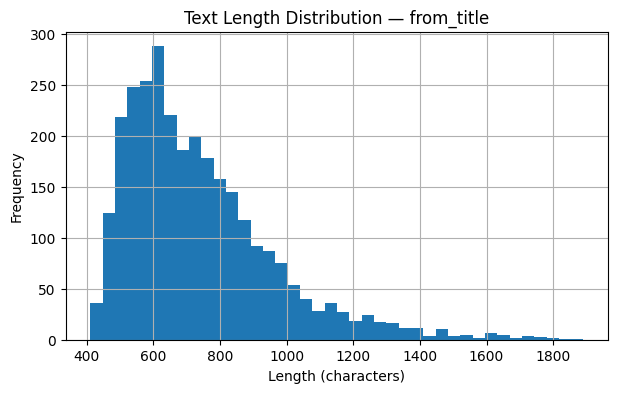

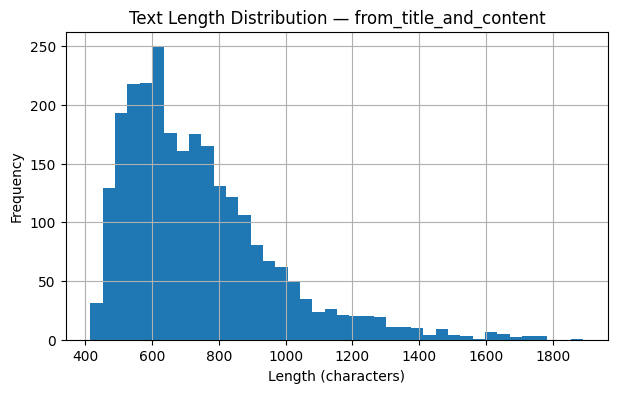

In [ ]:
for split, df in dfs.items():
    text_columns = [c for c in df.columns if c != "label"]
    if not text_columns:
        continue

    text_col = text_columns[0]

    plt.figure(figsize=(7, 4))
    df["text_length"].hist(bins=40)
    plt.title(f"Text Length Distribution — {split}")
    plt.xlabel("Length (characters)")
    plt.ylabel("Frequency")
    plt.show()

##Text Length vs. Word Count

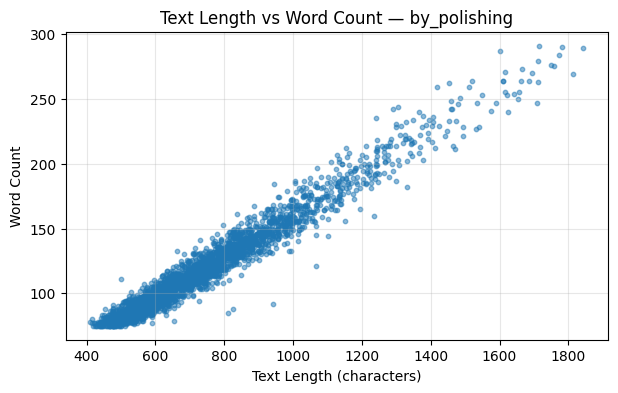

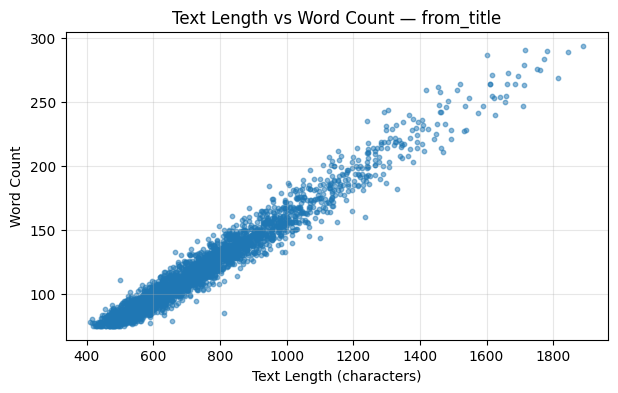

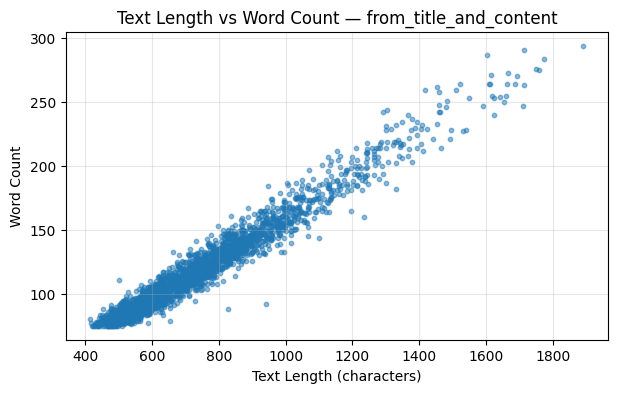

In [ ]:
for split, df in dfs.items():
    text_columns = [c for c in df.columns if c != "label"]
    if not text_columns:
        print(f"No text column found in {split}")
        continue

    text_col = text_columns[0]

    # compute text_length
    df["text_length"] = df[text_col].astype(str).apply(len)

    # compute word count
    df["word_count"] = df[text_col].astype(str).apply(lambda x: len(x.split()))

    plt.figure(figsize=(7, 4))
    plt.scatter(df["text_length"], df["word_count"], s=10, alpha=0.5)
    plt.title(f"Text Length vs Word Count — {split}")
    plt.xlabel("Text Length (characters)")
    plt.ylabel("Word Count")
    plt.grid(alpha=0.3)
    plt.show()